For space shuttles, how do we estimate failure risks and conduct safety analysis? We use pre-launch shuttle tests becuase actual space shuttle launches are rare, i.e. datasets are limited to work with.

**Key question:** What are the chances of castasphoric O-ring failure if the space shuttle is launched at $x$ °F?

In [14]:
rings <- read.csv("csv/Orings.csv")
str(rings)
# 'rings$Field' - binary var whether O-rings failed
# Each flight has 6 O-rings

# tells me how many O-rings out of 6 that failed in each flight
tapply(rings$Field, rings$Flight, sum)

# table of no. of flights vs. no. of failures
table(tapply(rings$Field, rings$Flight, sum))

'data.frame':	144 obs. of  5 variables:
 $ Flight: Factor w/ 24 levels "1","2","3","41-B",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ Date  : Factor w/ 24 levels "10/30/1985","10/3/1985",..: 14 14 14 14 14 14 5 5 5 5 ...
 $ Field : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Temp  : int  66 66 66 66 66 66 70 70 70 70 ...
 $ Pres  : int  50 50 50 50 50 50 50 50 50 50 ...


1    2    3 41-B 41-C 41-D 41-G    5 51-A 51-B 51-C 51-D 51-F 51-G 51-I 51-J 
   0    1    0    1    1    1    0    0    0    0    3    0    0    0    0    0 
   6 61-A 61-B 61-C 61-I    7    8    9 
   0    2    0    1   NA    0    0    0


 0  1  2  3 
16  5  1  1 

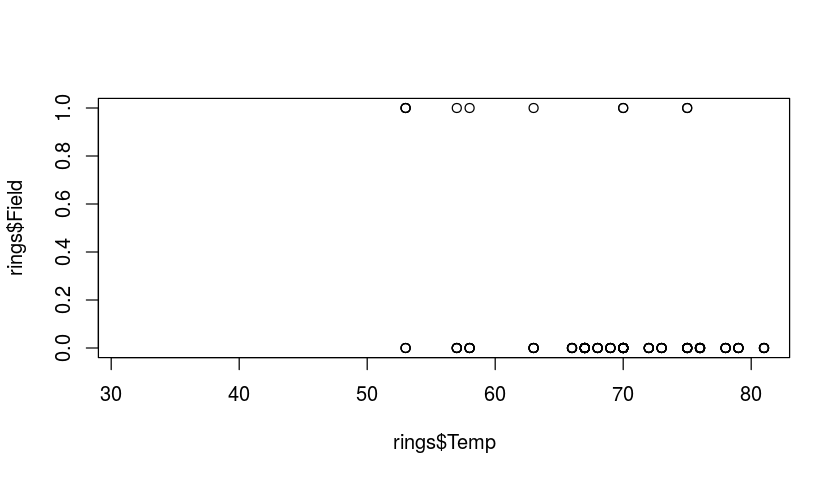

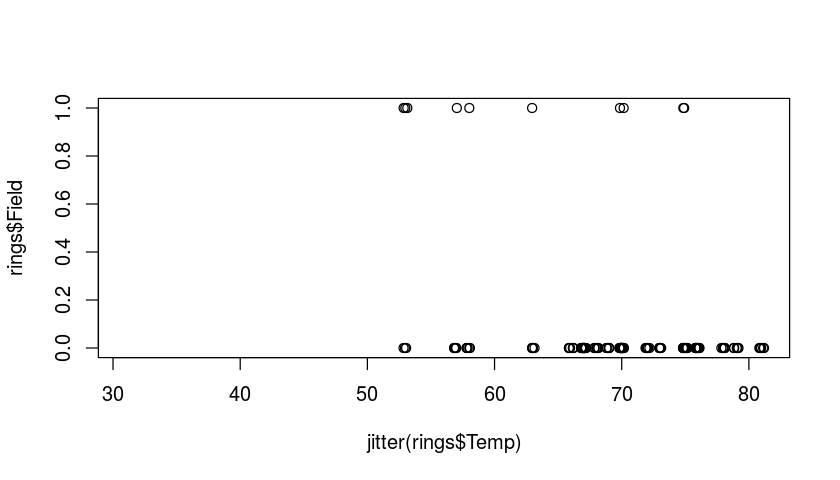

In [12]:
options(repr.plot.width=7, repr.plot.height=4) # resize IRkernel plot size

plot(rings$Temp, rings$Field)
# however, observe there are less plotpoints than there are total observations
# therefore, we introduce some small noise to the data to visualise this
plot(jitter(rings$Temp), rings$Field)

Visually, if we were to fit a linear regression model on this dataset, we may not obtain relevant results. We can see this below, where **rings\$Field** may in fact be $<0$ or $>1$ as **rings\$Temp** increases too much, which is in and of itself not a precise prediction of the problem itself.


Call:
lm(formula = Field ~ Temp + Pres, data = rings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27680 -0.09548 -0.03457 -0.00874  0.99126 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7264305  0.2181384   3.330  0.00112 ** 
Temp        -0.0106657  0.0030704  -3.474  0.00069 ***
Pres         0.0005783  0.0003176   1.821  0.07088 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2487 on 135 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.09941,	Adjusted R-squared:  0.08607 
F-statistic: 7.451 on 2 and 135 DF,  p-value: 0.0008524



Call:
lm(formula = Field ~ Temp, data = rings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24546 -0.09925 -0.06792 -0.00526  0.98429 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.798942   0.216289   3.694 0.000319 ***
Temp        -0.010443   0.003094  -3.375 0.000961 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2509 on 136 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.0773,	Adjusted R-squared:  0.07051 
F-statistic: 11.39 on 1 and 136 DF,  p-value: 0.0009612


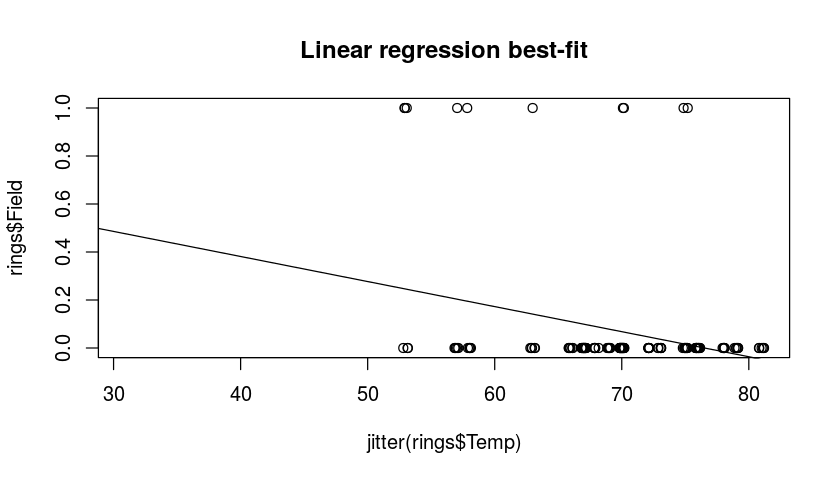

In [109]:
model1 <- lm(Field~Temp+Pres, data=rings)
summary(model1)

# Pressure variable is not significant; ignore this in second model

model2 <- lm(Field~Temp, data=rings)
summary(model2)
plot(jitter(rings$Temp), rings$Field, main="Linear regression best-fit")
abline(model2)

Hence, we shall use a logistic curve to predict binary value **rings\$Field** as a function of real value **rings\$Temp**. There are two ways of thinking of logistic regression:
- Classification problem predicting qualitative response given prediction variable **(see first plot below)**
- Regression problem where $P(yes/no)$ is predicted in terms of predictor **(see second codeblock below)**

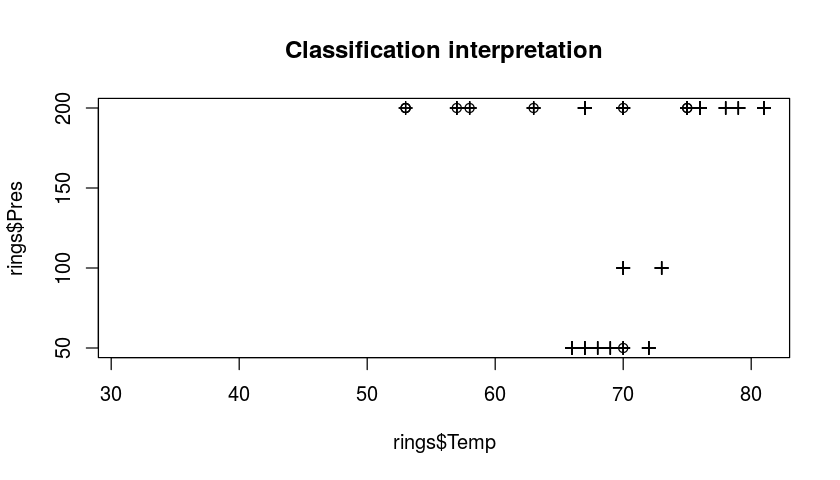

In [22]:
plot(rings$Temp, rings$Pres, pch=ifelse(rings$Field>0, 1, 3), main="Classification interpretation")

To fit a logistic regression model, the **glm()** function is used. 

Recall the linear regression model: $y=\beta_0 + \beta_1x_1 + \ldots + \beta_nx_n$
The logistic regression model utiltises the properties of the sigmoid function such that:

$$y_{logreg}= \frac{e^{y}}{1+e^{y}} = \frac{e^{\beta_0 + \beta_1x_1 + \ldots + \beta_nx_n}}{1+e^{\beta_0 + \beta_1x_1 + \ldots + \beta_nx_n}}$$

Unlike linear regression with normally distributed residuals, it is not possible to find a closed-form expression for the coefficient values that maximize the likelihood function, so that an iterative process must be used instead; for example Newton's method (see more [here](https://en.wikipedia.org/wiki/Logistic_regression#Maximum_likelihood_estimation)).

$$
\begin{equation*}
\begin{array}{ll@{}ll}
\text{minimise}  &\displaystyle\sum\limits_{j=1}^{m} w_{j}&x_{j} &\\
\text{subject to}&\displaystyle\sum\limits_{j:e_{i} \in S_{j}}   &x_{j} \geq 1,  &i=1 ,..., n\\
                 &                                                &x_{j} \in \{0,1\}, &j=1 ,..., m
\end{array}
\end{equation*}
$$



In [84]:
model3 <- glm(Field~Temp+Pres, data=rings, family=binomial)
summary(model3)


Call:
glm(formula = Field ~ Temp + Pres, family = binomial, data = rings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9243  -0.3680  -0.2432  -0.2059   2.8217  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  3.958071   3.497847   1.132  0.25781   
Temp        -0.119355   0.044945  -2.656  0.00792 **
Pres         0.008692   0.007689   1.130  0.25829   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 71.751  on 137  degrees of freedom
Residual deviance: 60.470  on 135  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 66.47

Number of Fisher Scoring iterations: 6


Here, deviance is a measure of fit of the GLM (lower is better). It is a generalization of the idea of using the sum of squares of residuals in ordinary least squares to cases where model-fitting is achieved by maximum likelihood.

- **Null deviance:** Measures how well the response variable is predicted by a model that includes just the intercept. Here, a *null model* is estimated on only one predictor variable, the intercept.

- **Residual deviance:** Measures how well the response variable is predicted by the intercept and the additional predictors included in the model. Here, a *proposed model* will have $k+1$ predictor variable.

A significant decrease in the value from null to residual deviance indicates the predictor variables are useful in making good predictors. For logistic regression problems, where $LL=$ log-likelihood:
- **Null deviance** = $-2\big(LL(Saturated\:Model) - LL(Null\:Model)\big)$
- **Residual deviance** = $-2\big(LL(Saturated\:Model) - LL(Proposed\:Model)\big)$

A *saturated model* assumes each data point has its own parameters, i.e. $n$ predictor variables.


Call:
glm(formula = Field ~ Temp, family = binomial, data = rings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9155  -0.3770  -0.3075  -0.2036   2.7387  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  6.75183    2.97991   2.266  0.02346 * 
Temp        -0.13971    0.04647  -3.007  0.00264 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 71.751  on 137  degrees of freedom
Residual deviance: 62.083  on 136  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 66.083

Number of Fisher Scoring iterations: 6


144 
2.420837

144 
0.9184025

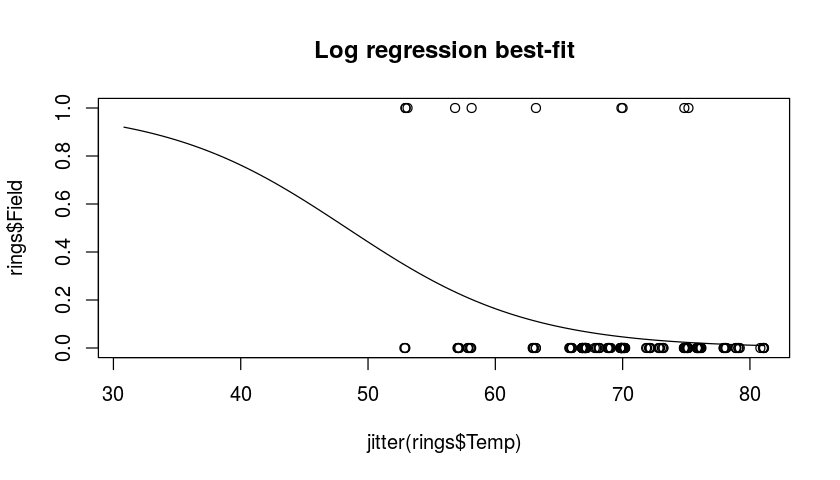

In [110]:
model4 <- glm(Field~Temp, data=rings, family=binomial)
summary(model4)

# we drop 'model3' and the 'pressure' predictor and use 'model4'
predict(model4, newdata=rings[144,]) # this gives linear value of y
predict(model4, newdata=rings[144,], type="response") # this gives probability estimate in sigmoid
plot(jitter(rings$Temp), rings$Field, main="Log regression best-fit")
curve(exp(coefficients(model4)[1]+coefficients(model4)[2]*x)/
      (1+exp(coefficients(model4)[1]+coefficients(model4)[2]*x)), add=T)

Now, we wish to predict responses based on *model4*. False postive/negative occurences are then computed, whenceforth model accuracy can be surmised.

In [123]:
pred <- predict(model4, newdata=rings, type="response")

table(pred[1:138]>0.5, rings$Field[1:138]) # FNR -> 1
table(pred[1:138]>0.2, rings$Field[1:138]) # if >20%, O-rings are considered to fail
table(pred[1:138]>0.05, rings$Field[1:138]) # if >5%, O-rings are considered to fail
table(pred[1:138]>0.01, rings$Field[1:138]) # FPR -> 1

       
          0   1
  FALSE 128  10

       
          0   1
  FALSE 115   5
  TRUE   13   5

       
         0  1
  FALSE 74  4
  TRUE  54  6

      
         0   1
  TRUE 128  10

There are two ways to validate and model's accuracy:
- Accuracy metric $=\frac{TN+FP}{TN+FP+TP+FN}$
- AUC: Area under ROC curve (usually with axes $TPR$(sensitivity) vs. $FPR$(Type 1; alpha) or $TNR$(specificity) vs. $FNR$(Type 2; beta), i.e. $Y$ vs. $X$, depending on context

Note that for an ROC curve with axes $TPR$ vs. $FPR$, a perfect prediction model will have a curve of $TPR=1$, whilst a perfectly random model will have a curve of $TPR=FPR$, as shown below.

The few curves below, specifically of the last three graphs, show the compromise to be made between satisfying both $TPR$ with $TNR$, as we've also seen in Term 5 Statistics. Recall that if $\alpha$ is lowered, $\beta$ increases (see [here](https://stats.stackexchange.com/questions/59202/stats-relationship-between-alpha-and-beta) for more information). Hence, one might decide to informally use a model that minimises $\alpha+\beta$, in optimising their log regression.

<img src="https://i.stack.imgur.com/LLWDR.png" width="600">

As for the AUROC, it has several equivalent interpretations:

- The expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative.
- The expected proportion of positives ranked before a uniformly drawn random negative.
- The expected true positive rate if the ranking is split just before a uniformly drawn random negative.
- The expected proportion of negatives ranked after a uniformly drawn random positive.
- The expected false positive rate if the ranking is split just after a uniformly drawn random positive.
- The probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example, i.e. $P\big(score(x^+) > score(x^-)\big)$


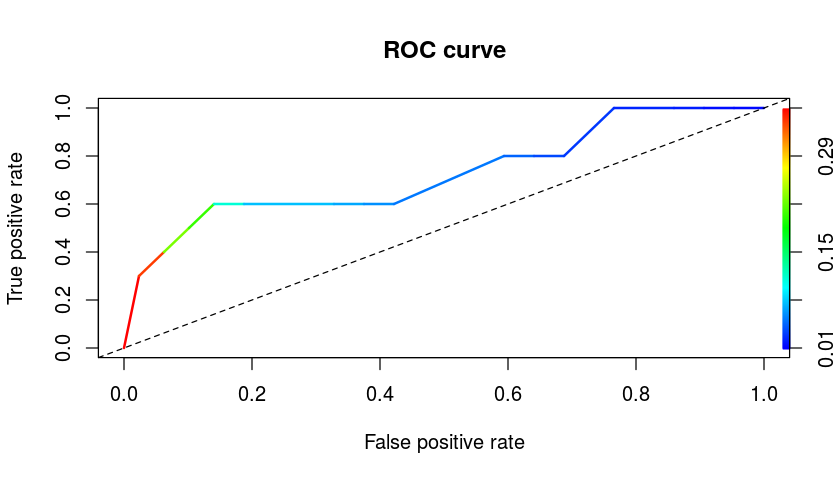

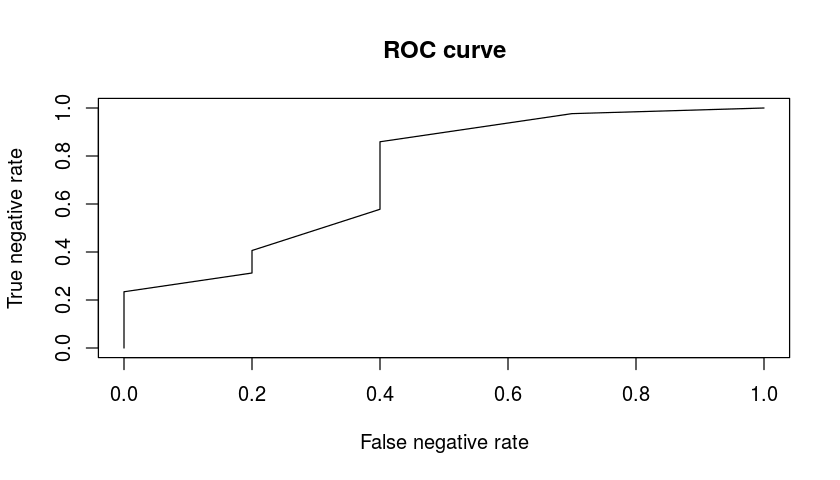

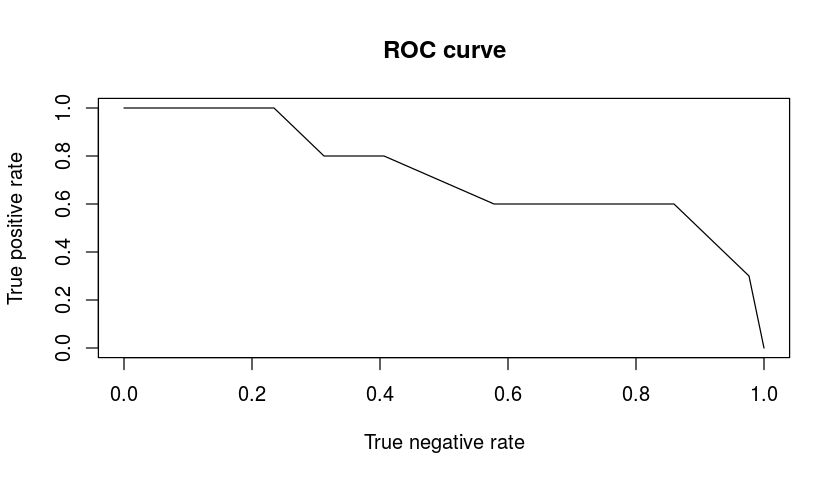

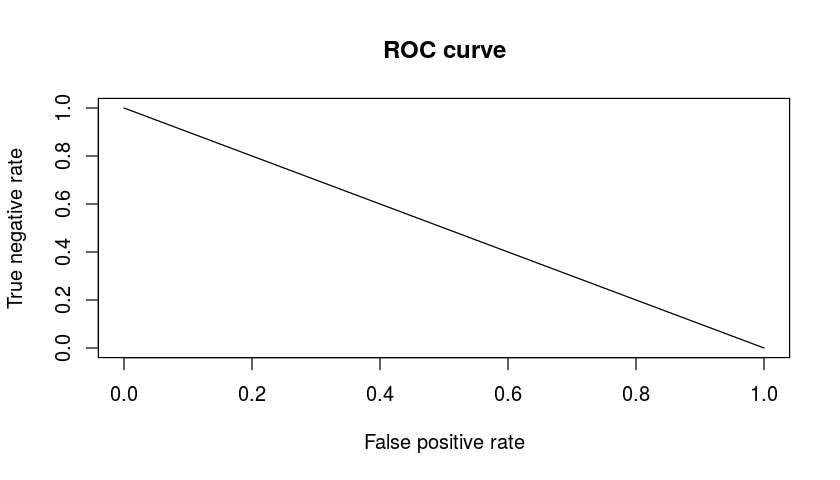

In [130]:
library("ROCR") # loads ROCR library to draw ROC curve

# ROCR function to first load 'pred' and 'rings$Field' into an object...
# ...upon which the data can be displayed/transmuted/graphed
# ?prediction 
ROCRpredict <- prediction(pred[1:138], rings$Field[1:138]) # load 'pred' and 'rings$Field'

# ROCR function to measure the performance of the prediction/regression model...
# ...using the metrics specified in the input parameters
# ?performance
ROCRperf <- performance(ROCRpredict, measure="tpr", x.measure="fpr")
ROCRperf2 <- performance(ROCRpredict, measure="tnr", x.measure="fnr")
ROCRperf3 <- performance(ROCRpredict, measure="tpr", x.measure="tnr")
ROCRperf4 <- performance(ROCRpredict, measure="tnr", x.measure="fpr")

# plot receiver operating characteristic (ROC) curve (TPR v. FPR)
plot(ROCRperf, main="ROC curve", lwd=2, colorize=T)
abline(0, 1, lty=2) # this line tells us how a perfectly random model will perform


plot(ROCRperf2, main="ROC curve")
plot(ROCRperf3, main="ROC curve")
plot(ROCRperf4, main="ROC curve")

# the few curves below tell us there is often a compromise to be made between satisfying...
# alpha and beta

In [128]:
rings[144,]

,Flight,Date,Field,Temp,Pres
144,61-I,1/28/1986,NA,31,200
